In [2]:
import numpy as np
import os
import pandas as pd
import seaborn as sns

In [3]:
songs = pd.read_excel("csv/unlabelled.xlsx")

songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          1066 non-null   object 
 1   Artists       1066 non-null   object 
 2   Track_id      1066 non-null   object 
 3   Album         1066 non-null   object 
 4   Release Date  1066 non-null   object 
 5   Image_URL     1066 non-null   object 
 6   Danceability  1066 non-null   float64
 7   Energy        1066 non-null   float64
 8   Loudness      1066 non-null   float64
 9   Speechiness   1066 non-null   float64
 10  Acousticness  1066 non-null   float64
 11  Tempo         1066 non-null   float64
 12  Liveness      1066 non-null   float64
 13  Valence       1066 non-null   float64
dtypes: float64(8), object(6)
memory usage: 116.7+ KB


In [4]:
songs


,Name,Artists,Track_id,Album,Release Date,Image_URL,Danceability,Energy,Loudness,Speechiness,Acousticness,Tempo,Liveness,Valence
0,Hosanna,"A.R. Rahman,Vijay Prakash,Suzanne D'Mello,Blaaze",3l7JaDIJmWMpvcJqhTJjrk,Vinnathaandi Varuvaayaa (Original Motion Pictu...,2010-01-08 00:00:00,https://i.scdn.co/image/ab67616d00001e0297838a...,0.582,0.812,-6.147,0.0418,0.166,86.051,0.0407,0.7000
1,Mazhai Varum - Female,"Joshua Sridhar,Suzanne D'Mello",6sewH6rrJZeM40FdCxbJP8,Veppam (Original Motion Picture Soundtrack),2011-01-06 00:00:00,https://i.scdn.co/image/ab67616d00001e028179a9...,0.697,0.690,-4.732,0.0302,0.188,95.014,0.1560,0.5860
2,Oru Kili Oru Kili,"Satish Chakravarthy,Shreya Ghoshal",4KeY07xAKNv7hftaTRaqy4,Leelai (Original Motion Picture Soundtrack),2009-08-18 00:00:00,https://i.scdn.co/image/ab67616d00001e0245c1b7...,0.602,0.614,-7.090,0.0434,0.249,113.986,0.3440,0.1920
3,Kaatrukullai,Yuvan Shankar Raja,3tOR1zae8trHZweUByE0Zv,Sarvam,2009-02-14 00:00:00,https://i.scdn.co/image/ab67616d00001e028f83ad...,0.805,0.588,-5.786,0.0311,0.431,119.990,0.1180,0.5180
4,Machaan Machaan,"Yuvan Shankar Raja,Ilaiyaraaja,Bela Shende",096wyG5zJ7oUaZqOCGmmqH,Silambattam (Original Motion Picture Soundtrack),2008-10-25 00:00:00,https://i.scdn.co/image/ab67616d00001e02794a0b...,0.627,0.682,-10.807,0.0895,0.331,173.968,0.1270,0.8170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061,Poi Vazhva,"Santhosh Narayanan,Vijaynarain",3JHqj3WfflTssLpj1Ymsw2,Manithan (Original Motion Picture Soundtrack),2016-04-08 00:00:00,https://i.scdn.co/image/ab67616d00001e02803e99...,0.694,0.425,-10.189,0.0349,0.630,118.869,0.1820,0.3480
1062,Dhimu Dhimu,"Harris Jayaraj,Karthik",6old0mA1IHi5lw2yLv3ri6,Engeyum Kadhal (Original Motion Picture Soundt...,2010-11-11 00:00:00,https://i.scdn.co/image/ab67616d00001e02340026...,0.643,0.478,-9.376,0.0274,0.569,93.418,0.1180,0.3170
1063,Madura Marikozhundhae,"A.R. Rahman,Anuradha Sriram,Shweta Mohan,Aparn...",4zfZi4L6lsf152iSWZo40Q,Chekka Chivantha Vaanam (Original Motion Pictu...,2018-09-28 00:00:00,https://i.scdn.co/image/ab67616d00001e025234d8...,0.238,0.372,-12.117,0.0316,0.545,70.674,0.0840,0.0703
1064,Poi Vaada,Srimathumitha,7KQzBQAJShO2Eik8SUjOJT,Dharmadurai (Original Motion Picture Soundtrack),2016-08-02 00:00:00,https://i.scdn.co/image/ab67616d00001e02ae45c8...,0.366,0.330,-7.198,0.0356,0.278,89.108,0.1090,0.1260


In [5]:
songs_features = songs.copy()
songs_features = songs_features.drop(['Name','Album','Release Date','Image_URL','Artists','Track_id','Liveness','Danceability','Tempo', 'Loudness','Speechiness','Acousticness'],axis=1)

In [6]:
songs_features


,Energy,Valence
0,0.812,0.7000
1,0.690,0.5860
2,0.614,0.1920
3,0.588,0.5180
4,0.682,0.8170
...,...,...
1061,0.425,0.3480
1062,0.478,0.3170
1063,0.372,0.0703
1064,0.330,0.1260


In [7]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,8)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(songs_features)
    Sum_of_squared_distances.append(km.inertia_)

In [8]:
from sklearn.metrics import silhouette_score
for n_clusters in range(2,8):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(songs_features)
    centers = clusterer.cluster_centers_

    score = silhouette_score (songs_features, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.44613190817218923)
For n_clusters = 3, silhouette score is 0.35133011285800547)
For n_clusters = 4, silhouette score is 0.3856039639879661)
For n_clusters = 5, silhouette score is 0.36793783604454317)
For n_clusters = 6, silhouette score is 0.3679960707944845)
For n_clusters = 7, silhouette score is 0.3513838030066604)


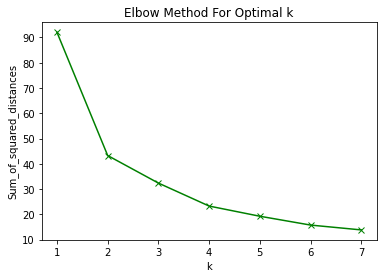

In [9]:
import matplotlib.pyplot as plt
plt.plot(K, Sum_of_squared_distances, 'gx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [10]:
kmeans = KMeans(n_clusters=4)
label = kmeans.fit_predict(songs_features)
print(label)


[2 1 0 ... 0 0 3]


In [11]:
songs_features['label'] = label
print(songs_features)

      Energy  Valence  label
0      0.812   0.7000      2
1      0.690   0.5860      1
2      0.614   0.1920      0
3      0.588   0.5180      1
4      0.682   0.8170      2
...      ...      ...    ...
1061   0.425   0.3480      0
1062   0.478   0.3170      0
1063   0.372   0.0703      0
1064   0.330   0.1260      0
1065   0.520   0.6310      3

[1066 rows x 3 columns]


In [12]:
from collections import Counter
Counter(kmeans.labels_)

Counter({2: 296, 1: 263, 0: 265, 3: 242})

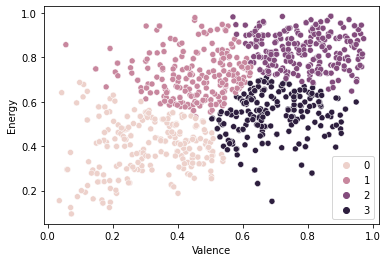

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=songs_features, x="Valence", y="Energy", hue=kmeans.labels_)
plt.show()

In [14]:
songs_features['label'].value_counts()

2    296
0    265
1    263
3    242
Name: label, dtype: int64

In [15]:
songs['label']=songs_features['label']

In [16]:
songs[songs['label'] == 0].head(5)

,Name,Artists,Track_id,Album,Release Date,Image_URL,Danceability,Energy,Loudness,Speechiness,Acousticness,Tempo,Liveness,Valence,label
2,Oru Kili Oru Kili,"Satish Chakravarthy,Shreya Ghoshal",4KeY07xAKNv7hftaTRaqy4,Leelai (Original Motion Picture Soundtrack),2009-08-18 00:00:00,https://i.scdn.co/image/ab67616d00001e0245c1b7...,0.602,0.614,-7.090,0.0434,0.2490,113.986,0.3440,0.192,0
17,Mannipaaya,"A.R. Rahman,Shreya Ghoshal",7mMkw0JFKnyMS6oGRT6b3O,Vinnathaandi Varuvaayaa (Original Motion Pictu...,2010-01-08 00:00:00,https://i.scdn.co/image/ab67616d00001e0297838a...,0.389,0.485,-8.961,0.0348,0.7000,175.991,0.1220,0.249,0
19,Yedho Ondru Ennai,Yuvan Shankar Raja,3c1tJAYgROZEdqRfm7Wsny,Paiya (Original Motion Picture Soundtrack),2010-11-22 00:00:00,https://i.scdn.co/image/ab67616d00001e027de895...,0.858,0.447,-7.917,0.0343,0.6700,119.980,0.0738,0.256,0
21,Iragai Poley,"Yuvan Shankar Raja,Tanvi Shah",3FRLxtpSk9BxxnxdS6I4jq,Naan Mahaan Alla (Original Motion Picture Soun...,2010-07-16 00:00:00,https://i.scdn.co/image/ab67616d00001e021ccfb3...,0.875,0.539,-8.364,0.0367,0.0586,115.004,0.1160,0.305,0
22,Eppo Nee,"G. V. Prakash,Madhusree",1ae6GtlSKSGfUnKDVmx1cw,Kaalai (Original Motion Picture Soundtrack),2008-09-26 00:00:00,https://i.scdn.co/image/ab67616d00001e02eb9156...,0.722,0.601,-5.721,0.0415,0.0475,105.020,0.1110,0.287,0


In [17]:
songs_features[songs_features['label'] == 0].describe()

,Energy,Valence,label
count,265.000000,265.000000,265.0
mean,0.403171,0.316440,0.0
std,0.115720,0.124211,0.0
min,0.095300,0.035900,0.0
25%,0.321000,0.217000,0.0
50%,0.416000,0.316000,0.0
75%,0.491000,0.421000,0.0
max,0.687000,0.540000,0.0


In [18]:
songs_features[songs_features['label'] == 1].describe()

,Energy,Valence,label
count,263.000000,263.000000,263.0
mean,0.718221,0.456787,1.0
std,0.102688,0.106091,0.0
min,0.532000,0.056100,1.0
25%,0.631000,0.389000,1.0
50%,0.709000,0.461000,1.0
75%,0.786000,0.541500,1.0
max,0.979000,0.625000,1.0


In [19]:
songs_features[songs_features['label'] == 2].describe()

,Energy,Valence,label
count,296.000000,296.000000,296.0
mean,0.836666,0.790095,2.0
std,0.077589,0.101196,0.0
min,0.648000,0.570000,2.0
25%,0.776000,0.704000,2.0
50%,0.834000,0.795000,2.0
75%,0.899000,0.864000,2.0
max,0.985000,0.972000,2.0


In [20]:
songs_features[songs_features['label'] == 3].describe()

,Energy,Valence,label
count,242.000000,242.000000,242.0
mean,0.538512,0.694058,3.0
std,0.105406,0.101190,0.0
min,0.152000,0.505000,3.0
25%,0.479000,0.617250,3.0
50%,0.553500,0.670500,3.0
75%,0.616750,0.776000,3.0
max,0.708000,0.949000,3.0


In [22]:
new_list=[]
for i , j in songs_features.iterrows():
    if j['label'] == 0:
        new_list.append('Sad')
    elif j['label'] == 1:
        new_list.append('Energitic')
    elif j['label'] == 2:
        new_list.append('Happy')
    else:
        new_list.append('Clam')

In [23]:
songs_features['Mood'] = new_list
songs_features

,Energy,Valence,label,Mood
0,0.812,0.7000,2,Happy
1,0.690,0.5860,1,Energitic
2,0.614,0.1920,0,Sad
3,0.588,0.5180,1,Energitic
4,0.682,0.8170,2,Happy
...,...,...,...,...
1061,0.425,0.3480,0,Sad
1062,0.478,0.3170,0,Sad
1063,0.372,0.0703,0,Sad
1064,0.330,0.1260,0,Sad


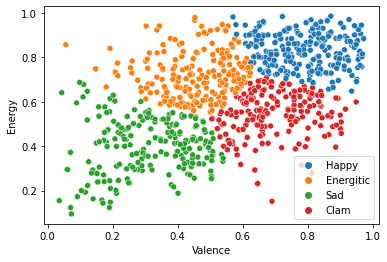

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=songs_features, x="Valence", y="Energy", hue=new_list)
plt.show()

In [25]:
data = songs_features.values
X = data[:,0:2]
Y = data[:,3]
print(data)

[[0.812 0.7 2 'Happy']
 [0.69 0.586 1 'Energitic']
 [0.614 0.192 0 'Sad']
 ...
 [0.372 0.0703 0 'Sad']
 [0.33 0.126 0 'Sad']
 [0.52 0.631 3 'Clam']]


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 4)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [29]:
predictions = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9579439252336449

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

        Clam       0.86      1.00      0.92        36
   Energitic       0.95      0.98      0.96        55
       Happy       1.00      0.92      0.96        62
         Sad       1.00      0.95      0.97        61

    accuracy                           0.96       214
   macro avg       0.95      0.96      0.96       214
weighted avg       0.96      0.96      0.96       214



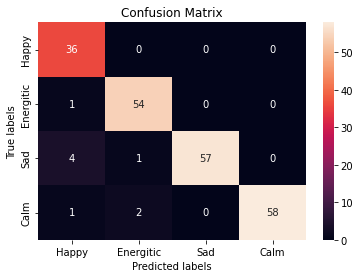

In [31]:
cm = confusion_matrix(y_test,predictions)
#plot the confusion matrix
ax = plt.subplot()
sns.heatmap(cm,annot=True,ax=ax)
labels = ['Happy','Energitic','Sad','Calm']
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

In [83]:
import pickle
with open('songmodel','wb') as f:
    pickle.dump(model, f)

In [32]:
songs_features2 = songs.copy()
songs_features2 = songs_features2.drop(['Name','Album','Release Date','Image_URL','Artists','Track_id','Liveness', 'Loudness','Speechiness','Acousticness'],axis=1)

In [33]:
songs_features2

,Danceability,Energy,Tempo,Valence,label
0,0.582,0.812,86.051,0.7000,2
1,0.697,0.690,95.014,0.5860,1
2,0.602,0.614,113.986,0.1920,0
3,0.805,0.588,119.990,0.5180,1
4,0.627,0.682,173.968,0.8170,2
...,...,...,...,...,...
1061,0.694,0.425,118.869,0.3480,0
1062,0.643,0.478,93.418,0.3170,0
1063,0.238,0.372,70.674,0.0703,0
1064,0.366,0.330,89.108,0.1260,0


In [35]:
songs_features2.describe()

,Danceability,Energy,Tempo,Valence,label
count,1066.000000,1066.000000,1066.00000,1066.000000,1066.000000
mean,0.652496,0.631994,118.24620,0.568313,1.483114
std,0.140717,0.196439,28.56597,0.218787,1.096386
min,0.082200,0.095300,61.01600,0.035900,0.000000
25%,0.571000,0.491000,94.94600,0.407000,1.000000
50%,0.665500,0.641000,115.32500,0.582000,2.000000
75%,0.754750,0.794000,136.92375,0.746000,2.000000
max,0.964000,0.985000,200.16300,0.972000,3.000000


In [37]:
Sum_of_squared_distances = []
K = range(1,8)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(songs_features2)
    Sum_of_squared_distances.append(km.inertia_)

In [39]:
for n_clusters in range(2,8):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(songs_features2)
    centers = clusterer.cluster_centers_

    score = silhouette_score (songs_features2, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.5917507363291635)
For n_clusters = 3, silhouette score is 0.6002149232926157)
For n_clusters = 4, silhouette score is 0.5525571969837945)
For n_clusters = 5, silhouette score is 0.516904634268308)
For n_clusters = 6, silhouette score is 0.5357484365694059)
For n_clusters = 7, silhouette score is 0.5308305030655776)


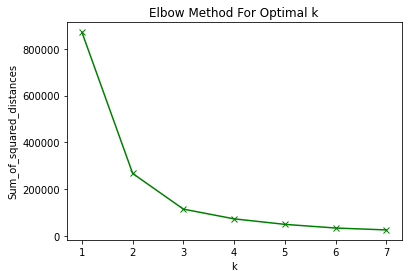

In [40]:
plt.plot(K, Sum_of_squared_distances, 'gx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [42]:
kmeans = KMeans(n_clusters=4)
label = kmeans.fit_predict(songs_features2)
print(label)

[2 2 0 ... 2 2 2]


In [45]:
songs_features2['label'] = label
print(songs_features2)

      Danceability  Energy    Tempo  Valence  label
0            0.582   0.812   86.051   0.7000      2
1            0.697   0.690   95.014   0.5860      2
2            0.602   0.614  113.986   0.1920      0
3            0.805   0.588  119.990   0.5180      0
4            0.627   0.682  173.968   0.8170      1
...            ...     ...      ...      ...    ...
1061         0.694   0.425  118.869   0.3480      0
1062         0.643   0.478   93.418   0.3170      2
1063         0.238   0.372   70.674   0.0703      2
1064         0.366   0.330   89.108   0.1260      2
1065         0.676   0.520   90.057   0.6310      2

[1066 rows x 5 columns]


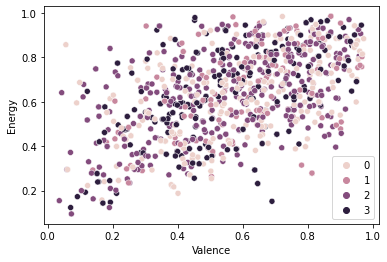

In [50]:
sns.scatterplot(data=songs_features2, x="Valence", y="Energy", hue=kmeans.labels_)
plt.show()

In [52]:
songs_features[songs_features['label'] == 0].describe()

,Energy,Valence,label
count,273.000000,273.000000,273.0
mean,0.623531,0.582068,0.0
std,0.190249,0.222368,0.0
min,0.158000,0.056100,0.0
25%,0.464000,0.406000,0.0
50%,0.644000,0.595000,0.0
75%,0.771000,0.770000,0.0
max,0.984000,0.972000,0.0
